<a href="https://colab.research.google.com/github/armelyara/hamoye_dsc_interns/blob/main/Code_Tag_Along_Stage_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

tf.compat.v1.disable_eager_execution()

ImportError: ignored

In [ ]:
#Load data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# prints Training data
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [ ]:
# prints Test data
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


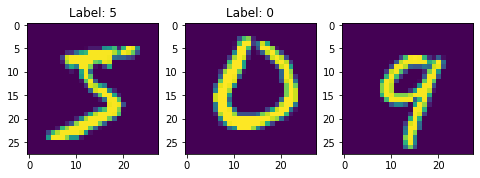

In [ ]:
#Visualize the images
plt.figure(figsize=(8, 5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show()

In [ ]:
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values 
# Dividing the data by 255 scales to the required range
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#Split training data to training and validation sets
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]
print("x_train: {}".format(x_train.shape)) # prints x_train: (50000, 28, 28)
print("x_val: {}".format(x_val.shape)) # prints x_val: (10000, 28, 28)
print("y_train: {}".format(y_train.shape)) #prints y_train: (50000,)
print("y_val: {}".format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
#Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)
print("x_train: {}".format(x_train.shape)) #prints x_train: (50000, 784)
print("x_val: {}".format(x_val.shape)) #prints x_val: (10000, 784)
print("test_images: {}".format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
#Encode labels to categorical variables
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

ModuleNotFoundError: ignored

In [ ]:
#Activation functions and Neural Networks hyperparameters
X = tf.compat.v1.placeholder(tf.float32, [None, new_dimension])
Y = tf.compat.v1.placeholder(tf.float32, [None, no_labels])
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
  # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
  second_bias))
  # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
  return logits

In [ ]:
#Call the multilayer perception function
logits = multilayer_perceptron(X, no_labels)
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

#initialise the variables
init = tf.global_variables_initializer()
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

#train model
with tf.Session() as session:
 session.run(init)
 for epoch in range(epochs):
   average_cost = 0
   start, end = 0, batch_size
   for i in range(iteration):
     batch_x, batch_y = x_train[start: end], y_train[start: end]
     _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
     start += batch_size
     end += batch_size 
     #average loss
     average_cost += loss/iteration
   print("Epoch========{}".format(epoch))